<a href="https://colab.research.google.com/github/kindaa/F1_EDA/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Formula 1 EDA**


---

F1 exploratory data analysis by Michelle Kinda and Julius Nyambok.
Dataset from Kaggle.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [29]:
#mounting drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Total circuits per country**

In [30]:
#importing the circuits csv then counting by name according to country and renaming name to total circuits
circuits = pd.read_csv('/content/drive/MyDrive/F1 dataset/circuits.csv')
df_circuits = circuits.groupby('country').agg({'name':'count'}).reset_index()
df_circuits.rename({'name':'total circuits'},axis=1,inplace=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

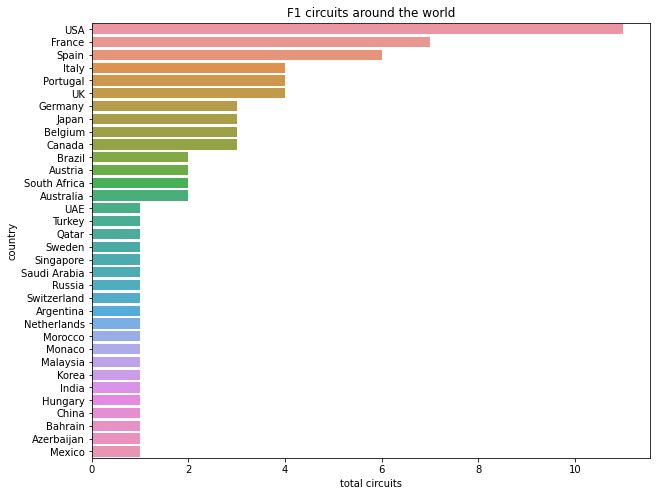

In [31]:
#visualizing the total circuits a bar plot figure
plt.figure(figsize=(10,8))
sns.barplot(data=df_circuits.sort_values('total circuits',ascending=False),x='total circuits',y='country')
plt.title('F1 circuits around the world')
plt

**Total drivers per nationality**

In [35]:
#Reading drivers' csv then grouping by nationality and renaming the axis driverRef to total drivers
drivers = pd.read_csv('/content/drive/MyDrive/F1 dataset/drivers.csv')
df_drivers = drivers.groupby('nationality').agg({'driverRef':'count'}).reset_index()
df_drivers = df_drivers.rename({'driverRef':'total_drivers'},axis=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

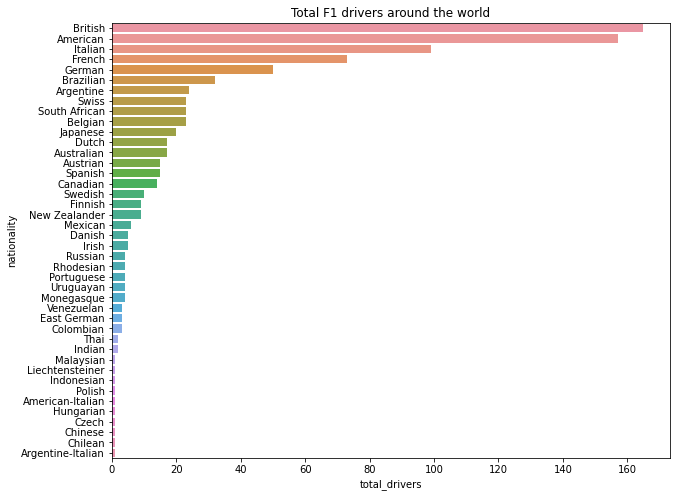

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_drivers.sort_values('total_drivers',ascending=False),
            x='total_drivers',y='nationality')
plt.title('Total F1 drivers around the world')
plt

**Constructors per nationality**

In [37]:
constructors = pd.read_csv('/content/drive/MyDrive/F1 dataset/constructors.csv')
df_constructors = constructors.groupby('nationality').agg({'constructorRef':'count'}).reset_index()
df_constructors = df_constructors.rename({'constructorRef':'total_constructors'},axis=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

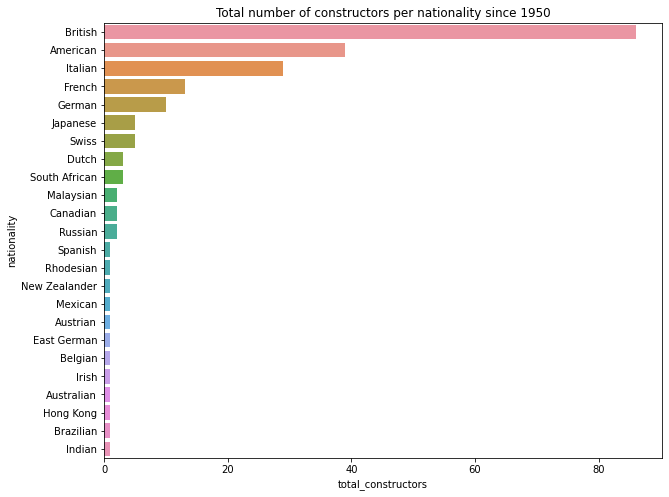

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_constructors.sort_values('total_constructors',ascending=False),
            x='total_constructors',y='nationality')
plt.title('Total number of constructors per nationality since 1950')
plt

**Constructors leaderboards**

In [50]:
construc_board = pd.read_csv('/content/drive/MyDrive/F1 dataset/constructor_standings.csv')
races = pd.read_csv('/content/drive/MyDrive/F1 dataset/races.csv',usecols=['raceId','year'])
construc_board= construc_board.merge(races,on='raceId',how='left')


In [51]:
construc_board = construc_board.merge(constructors[['constructorId','name']],on='constructorId',how='left')
construc_leaderboard = construc_board.groupby(['year','name']).agg({'points':'max'}).reset_index()
construc_leaderboard = construc_leaderboard.sort_values(['year','points'],ascending=[True,False])
construc_leaderboard = construc_leaderboard.rename({'name':'constructor'},axis=1)

In [55]:
traces = []
buttons = []
years = sorted(construc_leaderboard.year.unique())
for i, year in enumerate(years):
    visible = [False] * len(years)
    visible[i] = True
    df = construc_leaderboard[construc_leaderboard.year == year]
    colors = ['lightslategray',] * len(df.constructor.unique())
    colors[0] = 'crimson'
    traces.append(
        px.bar(data_frame=df,x='constructor', y='points')\
            .update_traces(visible=True if i==0 else False,marker_color=colors).data[0]
    )
    buttons.append(dict(label=str(year),
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"Constructor Leaderboard: Season {year}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title='Constructor Leaderboard: Season 1958',title_x=0.5)
fig